##Setup

Installiere zunächst die erforderlichen Bibliotheken:

In [1]:
!pip install ultralytics roboflow opencv-python
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

##Dataset vorbereiten und laden

Aus Robloflow wird ein Datensatz genommen, vorbereitet und geladen für das Modelltraining.

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="R9VyjDodYg9dCZe6zld4")
project = rf.workspace("project-t8mca").project("advertising-banner-finder")
version = project.version(3)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to advertising-banner-finder-3 in yolov12:: 100%|██████████| 116/116 [00:00<00:00, 7480.62it/s]


##Dataset prüfen und Samples inkl. Annotationen anzeigen

In diesem Kapitel geht es darum, sicherzustellen, dass das Dataset korrekt geladen und die Annotationen (z.B. Bounding Boxes) für die Objekterkennung im Bild vorhanden und korrekt formatiert sind. Dies ist ein wichtiger Schritt vor dem Training eines Modells, da es sicherstellt, dass die Daten in der richtigen Form vorliegen, um das Modell effektiv zu trainieren.

Anzahl der Bilder: 10
Anzahl der Label-Dateien: 10

Annotationen für 00005084_20230316-112521_Link02_png.rf.09822a78a2d09005493055aeb848d7c5.jpg:
1 0.2797989515625 0.24495702968750002 0.2616207328125 0.759110846875 0.7753663546875 0.796462659375 0.8040268749999999 0.200280440625 0.2797989515625 0.24495702968750002
Überspringe ungültige Annotation (nicht 5 Werte): 1 0.2797989515625 0.24495702968750002 0.2616207328125 0.759110846875 0.7753663546875 0.796462659375 0.8040268749999999 0.200280440625 0.2797989515625 0.24495702968750002


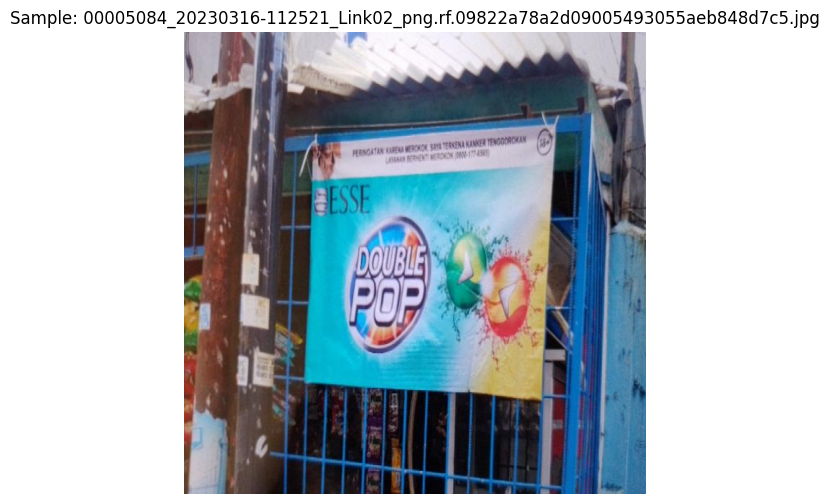


Annotationen für 00003727_20230316-123239_Link01_png.rf.07067f415cdef16a2a477c344510315c.jpg:
1 0.3561355140625 0.9264583875 0.6599580484375001 0.913624690625 0.646621903125 0.7476156375 0.630879021875 0.48038359531249997 0.623602475 0.2343958625 0.58916535625 0.22125185468750003 0.3070306 0.188017359375 0.247337278125 0.20384615468749998 0.23475782500000003 0.47704855 0.1919246515625 0.8728641218750001 0.19287195937499998 0.9210377624999999 0.3561355140625 0.9264583875
Überspringe ungültige Annotation (nicht 5 Werte): 1 0.3561355140625 0.9264583875 0.6599580484375001 0.913624690625 0.646621903125 0.7476156375 0.630879021875 0.48038359531249997 0.623602475 0.2343958625 0.58916535625 0.22125185468750003 0.3070306 0.188017359375 0.247337278125 0.20384615468749998 0.23475782500000003 0.47704855 0.1919246515625 0.8728641218750001 0.19287195937499998 0.9210377624999999 0.3561355140625 0.9264583875


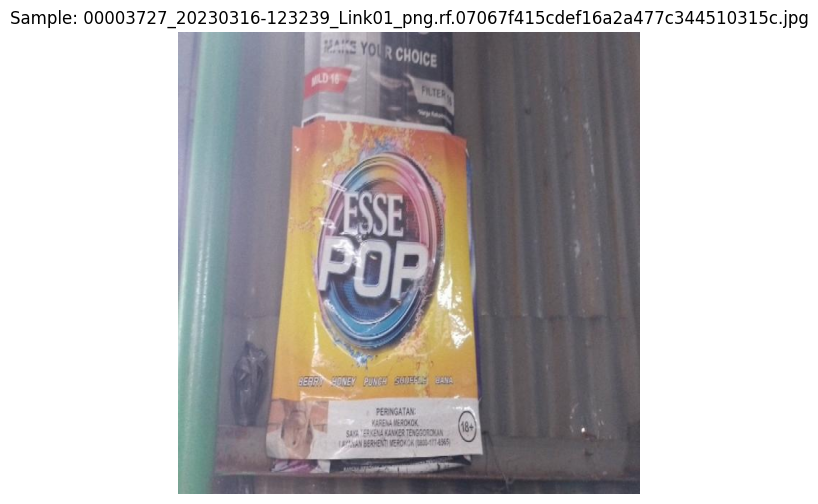


Annotationen für 00005523_20230316-092228_Link03_png.rf.effac4cbd94e35d9a9549626004580a6.jpg:
1 0.068987784375 0.31402910781250004 0.017220509375 0.542323303125 0.667751190625 0.5383989171875 0.6655378890625 0.273251403125 0.068987784375 0.31402910781250004
Überspringe ungültige Annotation (nicht 5 Werte): 1 0.068987784375 0.31402910781250004 0.017220509375 0.542323303125 0.667751190625 0.5383989171875 0.6655378890625 0.273251403125 0.068987784375 0.31402910781250004


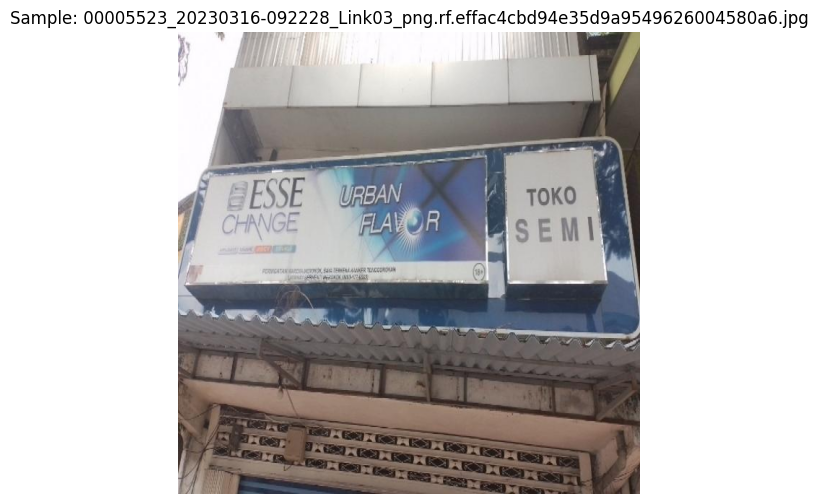

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from pathlib import Path

# Verzeichnis mit den Trainingsdaten
image_folder = '/content/advertising-banner-finder-3/valid/images'  # Pfad zu den Bildern
label_folder = '/content/advertising-banner-finder-3/valid/labels'  # Pfad zu den Annotationsdateien

# Überprüfe, ob Bilder und Labels existieren
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]  # oder '.png'
label_files = [f for f in os.listdir(label_folder) if f.endswith('.txt')]

print(f"Anzahl der Bilder: {len(image_files)}")
print(f"Anzahl der Label-Dateien: {len(label_files)}")

# Zeige 3 zufällige Samples mit Annotationen
for _ in range(3):  # Zeige 3 zufällige Samples
    # Wähle ein zufälliges Bild
    image_file = random.choice(image_files)
    image_path = os.path.join(image_folder, image_file)

    # Lade das Bild
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konvertiere von BGR zu RGB für Matplotlib

    # Lade die zugehörige Annotationsdatei (YOLO-Format)
    label_file = image_file.replace('.jpg', '.txt')  # gleiche Namenskonvention wie bei den Bildern
    label_path = os.path.join(label_folder, label_file)

    # Überprüfe, ob die Label-Datei existiert
    if os.path.exists(label_path):
        # Lade die Annotationen
        with open(label_path, 'r') as f:
            annotations = f.readlines()

        # Ausgabe der Annotationen
        print(f"\nAnnotationen für {image_file}:")
        for annotation in annotations:
            print(annotation.strip())  # .strip() entfernt führende und nachfolgende Leerzeichen/Zeilenumbrüche

        # Zeichne die Bounding Boxes auf das Bild
        for annotation in annotations:
            # Entferne Leerzeichen und überprüfe, ob die Annotation genau 5 Werte enthält
            annotation = annotation.strip()  # Entfernt führende/trailing Leerzeichen und Zeilenumbrüche

            # Überspringe leere Zeilen oder Zeilen mit falscher Anzahl an Werten
            if not annotation:  # Leere Zeilen überspringen
                continue
            annotation_values = annotation.split()

            # Überprüfe, ob die Annotation genau 5 Werte hat
            if len(annotation_values) == 5:
                # YOLO-Format: class_id x_center y_center width height (normalisierte Werte)
                class_id, x_center, y_center, width, height = map(float, annotation_values)

                # Bilddimensionen
                img_height, img_width, _ = img.shape

                # Berechne die Bounding Box-Koordinaten (Pixelwerte)
                x_min = int((x_center - width / 2) * img_width)
                y_min = int((y_center - height / 2) * img_height)
                x_max = int((x_center + width / 2) * img_width)
                y_max = int((y_center + height / 2) * img_height)

                # Zeichne die Bounding Box auf das Bild
                cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # Blau für Bounding Box
                # Füge das Label hinzu
                cv2.putText(img_rgb, str(int(class_id)), (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
            else:
                # Ausgabe der fehlerhaften Annotationen
                print(f"Überspringe ungültige Annotation (nicht 5 Werte): {annotation}")

    # Zeige das Bild mit Annotationen an
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis('off')  # Achsen ausblenden
    plt.title(f"Sample: {image_file}")
    plt.show()


##Modell trainieren

Nutze Google Colab, um das Modell zu trainieren:

In [4]:
from ultralytics import YOLO

# Modell laden
model = YOLO('yolo12s.pt')  # Wähle je nach Bedarf yolov12n, yolov12s, yolov12m, yolov12l oder yolov12x

# Training starten
results = model.train(
    data='/content/advertising-banner-finder-3/data.yaml',  # Pfad zur YAML-Datei deines Datensatzes
    epochs=10,
    imgsz=640,
    batch=2,
    device='cpu'  # Setze auf 'cpu' oder 'cuda' je nach Verfügbarkeit
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.1M/18.1M [00:00<00:00, 112MB/s] 


Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/advertising-banner-finder-3/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

  8                  -1  2   2689536  ultralytics.nn.modules.block.A2C2f           [512, 512, 2, True, 1]        
  9                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 10             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 11                  -1  1    345856  ultralytics.nn.modules.block.A2C2f           [768, 256, 1, False, -1]      
 12                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 13             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 14                  -1  1     95104  ultralytics.nn.modules.block.A2C2f           [512, 128, 1, False, -1]      
 15                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 16            [-1, 11]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/advertising-banner-finder-3/train/labels... 36 images, 1 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 1970.44it/s]

train: New cache created: /content/advertising-banner-finder-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1869.0±294.2 MB/s, size: 61.8 KB)


val: Scanning /content/advertising-banner-finder-3/valid/labels... 10 images, 1 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 2833.99it/s]

val: New cache created: /content/advertising-banner-finder-3/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 11. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.131      9.073      1.638          3        640: 100%|██████████| 18/18 [01:12<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.95s/it]

                   all         10         11      0.964      0.143      0.187      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.175      6.899      1.668          3        640: 100%|██████████| 18/18 [01:11<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.58s/it]

                   all         10         11      0.139      0.411      0.186      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.238       5.89      1.721          2        640: 100%|██████████| 18/18 [01:13<00:00,  4.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.87s/it]

                   all         10         11      0.162      0.357      0.246      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.238      5.497       1.78          2        640: 100%|██████████| 18/18 [01:16<00:00,  4.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.76s/it]

                   all         10         11      0.162      0.357      0.246      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.179      5.254      1.769          5        640: 100%|██████████| 18/18 [01:13<00:00,  4.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.91s/it]

                   all         10         11      0.648      0.196      0.215      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.158      4.809      1.705          2        640: 100%|██████████| 18/18 [01:14<00:00,  4.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.50s/it]

                   all         10         11      0.648      0.196      0.215      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.444      4.177       1.99          2        640: 100%|██████████| 18/18 [01:14<00:00,  4.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.04s/it]

                   all         10         11       0.17      0.625     0.0881     0.0215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.534      4.049      2.188          2        640: 100%|██████████| 18/18 [01:14<00:00,  4.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.89s/it]

                   all         10         11      0.526      0.411      0.311      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.317      3.475      1.713          2        640: 100%|██████████| 18/18 [01:13<00:00,  4.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.67s/it]

                   all         10         11      0.526      0.411      0.311      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.253      3.295       1.79          5        640: 100%|██████████| 18/18 [01:13<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.96s/it]

                   all         10         11       0.69      0.357      0.269      0.151



10 epochs completed in 0.230 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.9MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv12s summary (fused): 159 layers, 9,231,654 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.02s/it]


                   all         10         11       0.16      0.357      0.246      0.169
Current Advertising Banner          3          4          0          0    0.00974    0.00338
Past Advertising Banner          6          7       0.32      0.714      0.482      0.335
Speed: 4.4ms preprocess, 721.7ms inference, 0.0ms loss, 168.8ms postprocess per image
Results saved to runs/detect/train


##Vorhersagen durchführen

Nach dem Training kannst du Vorhersagen auf Bildern aus deinem Validierungsdatensatz durchführen:


0: 640x640 17 Past Advertising Banners, 760.5ms
Speed: 3.4ms preprocess, 760.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


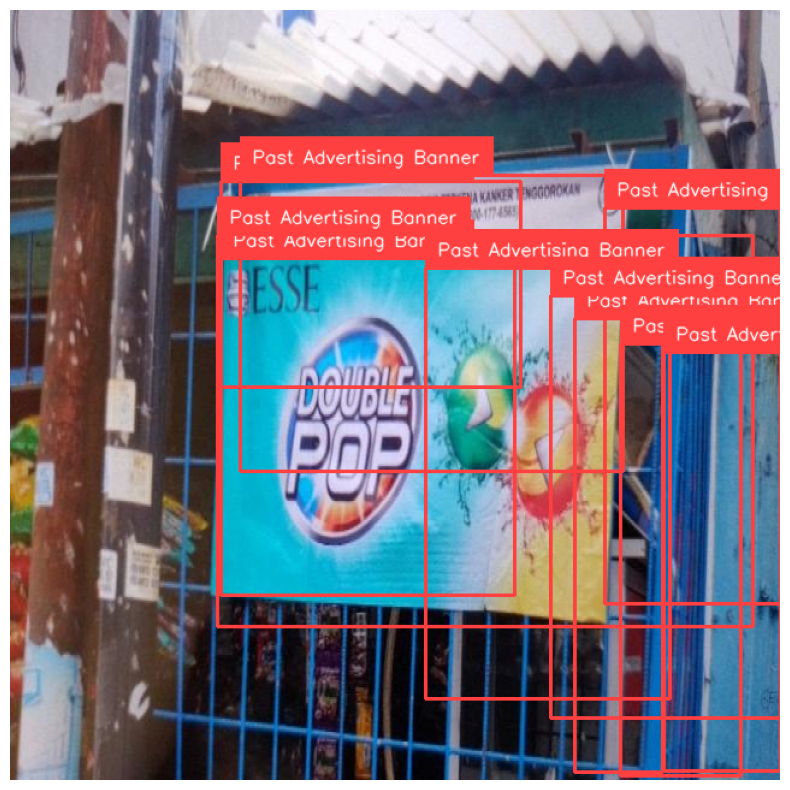

In [10]:
import random
import cv2
import matplotlib.pyplot as plt
from supervision import Detections, BoxAnnotator, LabelAnnotator
from pathlib import Path

# Modell laden
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Pfad zum besten Modell

# Hier definieren wir den Datensatz (ds) als die Liste der Bilder aus dem Validierungsordner
dataset_path = '/content/advertising-banner-finder-3/valid/images'  # Beispiel für den Pfad zu den Validierungsbildern
image_paths = list(Path(dataset_path).glob('*.jpg'))  # Oder '*.png', je nachdem welches Format du verwendest

# Zufälliges Bild aus dem Validierungsdatensatz auswählen
image_path = random.choice(image_paths)
image = cv2.imread(str(image_path))

# Vorhersage durchführen
results = model(image)[0]
detections = Detections.from_ultralytics(results).with_nms()

# Annotationen hinzufügen
box_annotator = BoxAnnotator()  # Achte auf den neuen Namen (BoxAnnotator statt BoundingBoxAnnotator)
label_annotator = LabelAnnotator()
annotated_image = box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Ergebnis mit matplotlib anzeigen
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))  # Umwandlung von BGR nach RGB
plt.axis('off')  # Achsen ausschalten
plt.show()

##Modell evaluieren

Um die Leistung deines Modells zu bewerten, kannst du Metriken wie F1-Score, Recall und Precision verwenden:

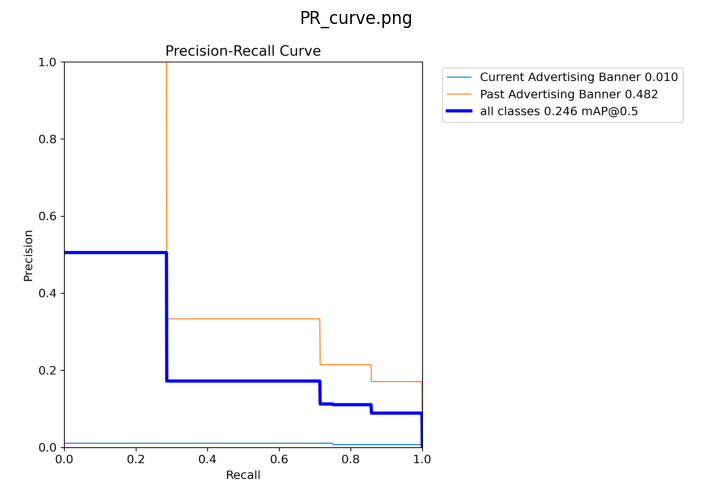

<Figure size 640x480 with 0 Axes>

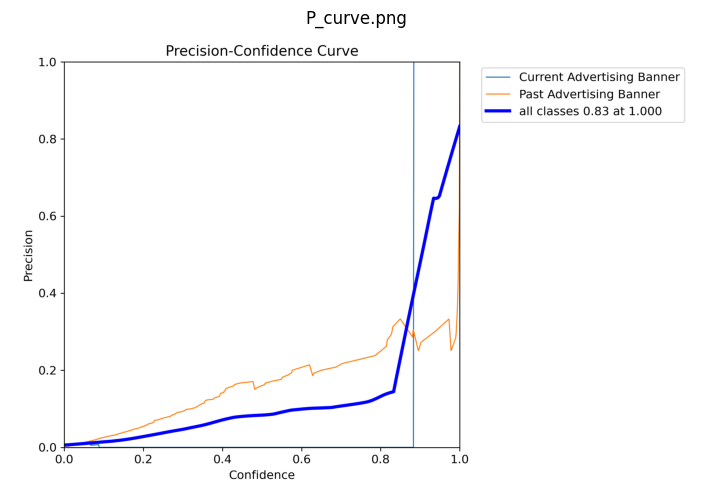

<Figure size 640x480 with 0 Axes>

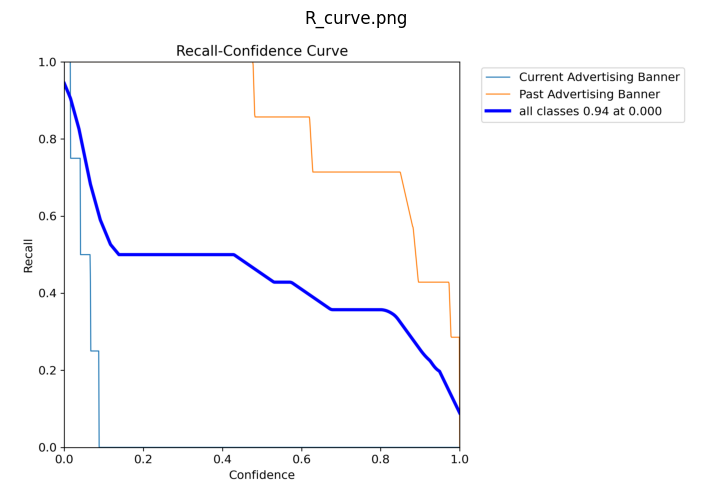

<Figure size 640x480 with 0 Axes>

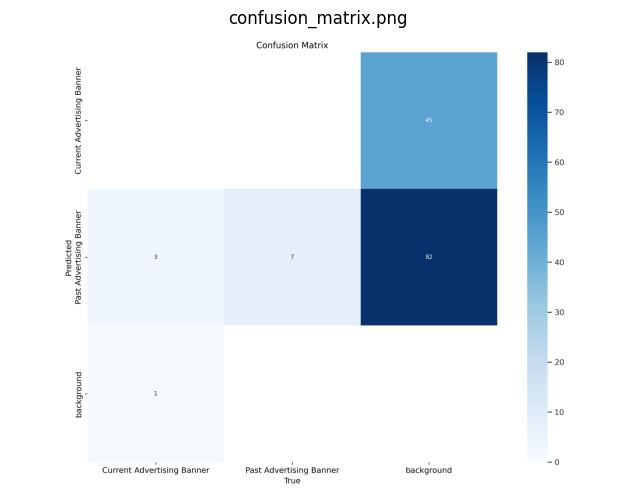

<Figure size 640x480 with 0 Axes>

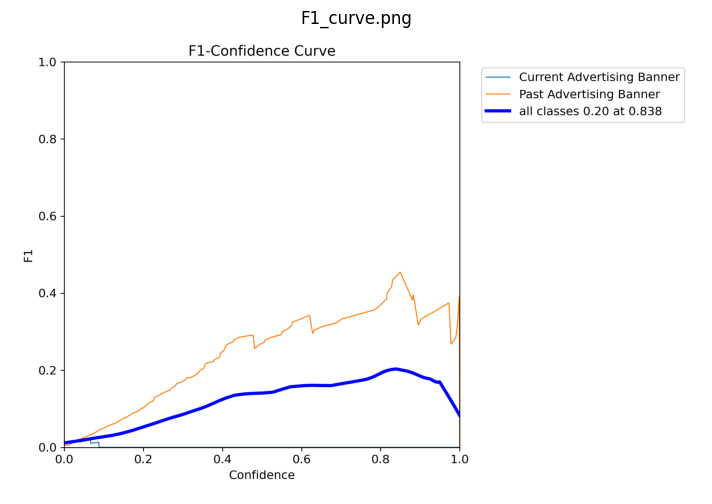

<Figure size 640x480 with 0 Axes>

In [9]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Verzeichnis mit den PNG-Bildern
image_folder = '/content/runs/detect/train/'

# Liste der Bilddateien
image_files = [
    "PR_curve.png",
    "P_curve.png",
    "R_curve.png",
    "confusion_matrix.png",
    "F1_curve.png"
]

# Zeige jedes Bild mit Abstand
for image_file in image_files:
    # Bild laden
    img_path = os.path.join(image_folder, image_file)
    img = mpimg.imread(img_path)

    # Erstelle eine neue Figur mit plt.subplots() und füge das Bild hinzu
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    ax.axis('off')  # Achsen ausblenden
    ax.set_title(image_file)  # Bildname als Titel
    plt.show()  # Bild anzeigen

    # Abstand hinzufügen zwischen den Bildern
    plt.subplots_adjust(hspace=0.5)  # hspace fügt vertikalen Abstand hinzu


### Precision Curve

**Definition**:  
Die **Precision Curve** zeigt, wie sich die Precision eines Klassifikators in Abhängigkeit von der Konfidenz des Modells verändert. Der Schwellenwert des Modells beeinflusst, wie sicher das Modell sein muss, um eine positive Klassifikation zu treffen.  

**Precision**:  
Precision ist der Anteil der korrekt identifizierten positiven Vorhersagen an allen Vorhersagen, die als positiv klassifiziert wurden.  

**Interpretation**:  
Ein hoher Wert auf der Precision-Kurve bedeutet, dass das Modell eine hohe Präzision bei seinen positiven Vorhersagen hat und nur wenige falsch-positive Vorhersagen macht.

<br>
<br>


### Recall Curve

**Definition**:  
Die **Recall Curve** zeigt, wie sich der Recall eines Klassifikators bei verschiedenen Schwellenwerten verändert. Recall misst den Anteil der tatsächlichen positiven Instanzen, die korrekt vom Modell erkannt wurden.  

**Recall**:  
Recall ist der Anteil der positiven Instanzen, die das Modell korrekt identifiziert hat, aus allen tatsächlich positiven Instanzen.  

**Interpretation**:  
Ein hoher Wert auf der Recall-Kurve bedeutet, dass das Modell viele der tatsächlichen positiven Instanzen korrekt identifiziert, jedoch könnte auch eine höhere Anzahl an falsch-positiven Vorhersagen produziert werden.

<br>
<br>

### Confusion Matrix (Verwirrungsmatrix)

**Definition**:  
Die **Confusion Matrix** zeigt die Leistung eines Klassifikators und gibt an, wie oft jede Klasse korrekt oder falsch klassifiziert wurde.  

**Werte der Matrix**:  
- **True Positives (TP)**: Richtig positiv klassifizierte Instanzen.  
- **False Positives (FP)**: Fälschlicherweise als positiv klassifizierte Instanzen.  
- **True Negatives (TN)**: Richtig negativ klassifizierte Instanzen.  
- **False Negatives (FN)**: Fälschlicherweise als negativ klassifizierte Instanzen.  

**Interpretation**:  
Eine gute Confusion Matrix zeigt hohe Werte in den Zellen für True Positives und True Negatives, was bedeutet, dass das Modell viele Instanzen korrekt klassifiziert hat.

<br>
<br>


### F1 Score Curve

**Definition**:  
Der **F1-Score** ist das harmonische Mittel von Precision und Recall und hilft dabei, ein ausgewogenes Maß für die Leistung eines Modells zu berechnen.  

**F1-Score**:  
Der F1-Score kombiniert die Precision und den Recall eines Modells und ist besonders nützlich, wenn eine Balance zwischen diesen beiden Metriken gewünscht wird.  

**Interpretation**:  
Ein hoher F1-Score bedeutet, dass das Modell sowohl eine hohe Präzision als auch einen hohen Recall aufweist. Dies zeigt, dass das Modell keine großen Kompromisse bei einer der beiden Metriken eingeht.

<br>
<br>

### Precision-Recall Curve (PR Curve)

**Definition**:  
Die **Precision-Recall Curve** zeigt das Verhältnis zwischen Precision (Präzision) und Recall (Sensitivität) des Klassifikators bei verschiedenen Schwellenwerten.  

**Precision**:  
Precision ist der Anteil der korrekt identifizierten positiven Vorhersagen an allen Vorhersagen, die das Modell als positiv klassifiziert hat.  

**Recall**:  
Recall ist der Anteil der tatsächlich positiven Instanzen, die korrekt vom Modell erkannt wurden.  

**Interpretation**:  
Eine gute PR-Kurve zeigt, dass das Modell sowohl eine hohe Precision als auch einen hohen Recall erreicht. Wenn der Bereich unter der Kurve groß ist, bedeutet das ein gutes Modell.


##Hyperparameter-Tuning

Für eine feinere Anpassung deines Modells kannst du Hyperparameter wie Lernrate, Anzahl der Epochen und Batch-Grösse und sehr viele weitere Parameter anpassen. Nachfolgend wird in der Tabelle angezeigt welche Möglichkeiten für das Hyperparamter-Tuning bestehen sowie ein Beispielcode:

| Argument   | Typ            | Standard | Beschreibung |
|------------|----------------|----------|--------------|
| `model`    | `str`          | `None`   | Gibt die Modelldatei für das Training an. Akzeptiert einen Pfad zu entweder einer `.pt` vortrainiertes Modell oder eine `.yaml` Konfigurationsdatei. Unerlässlich für die Definition der Modellstruktur oder die Initialisierung von Gewichten. |
| `data`     | `str`          | `None`   | Pfad zur Konfigurationsdatei des Datensatzes (z. B. `coco8.yaml`). Enthält Pfade zu Trainings- und Validierungsdaten, Klassennamen und Anzahl der Klassen. |
| `epochs`   | `int`          | `100`    | Gesamtzahl der Trainingsepochen. Jede Epoche stellt einen vollständigen Durchlauf durch den Datensatz dar. Anpassung dieses Wertes beeinflusst Dauer und Leistung. |
| `time`     | `float`        | `None`   | Maximale Trainingszeit in Stunden. Überschreibt `epochs`-Wert. Automatischer Abbruch nach angegebener Dauer, z. B. bei begrenzten Ressourcen. |
| `patience` | `int`          | `100`    | Anzahl Epochen ohne Validierungsverbesserung, bevor das Training gestoppt wird. Verhindert Überanpassung. |
| `batch`    | `int`          | `16`     | Batch-Größe. Drei Modi: fester Wert (z. B. `16`), `-1` für automatische GPU-Auslastung oder z. B. `0.70` für 70 %-Nutzung. |
| `imgsz`    | `int or list`  | `640`    | Zielbildgröße, auf die alle Trainingsbilder skaliert werden. Beeinflusst Genauigkeit und Rechenaufwand. |
| `save`     | `bool`         | `True`   | Speichert Kontrollpunkte und finale Gewichte. Nützlich für Wiederaufnahme und Deployment. |
| `save_period` | `int`       | `-1`     | Speichert Modell alle `n` Epochen. `-1` deaktiviert periodisches Speichern. |
| `cache`    | `bool`         | `False`  | Zwischenspeicherung von Bildern im RAM (`True`), auf Disk (`'disk'`) oder deaktiviert (`False`). Beschleunigt Training, benötigt aber Speicher. |
| `device`       | `int / str / list` | `None`   | Gibt das Rechengerät an: einzelne GPU (`0`), mehrere GPUs (`[0,1]`), CPU (`'cpu'`), Apple MPS (`'mps'`) oder automatisch (`-1`/`[-1,-1]`). |
| `workers`      | `int`              | `8`      | Anzahl der Threads für Datenladen pro Prozess. Erhöht Datenvorverarbeitungsgeschwindigkeit. |
| `project`      | `str`              | `None`   | Name des Projektverzeichnisses für Trainingsergebnisse. |
| `name`         | `str`              | `None`   | Name des Trainingslaufs. Erstellt Unterverzeichnis im Projektordner. |
| `exist_ok`     | `bool`             | `False`  | Überschreibt bestehende Projektnamenverzeichnisse, wenn `True`. |
| `pretrained`   | `bool or str`      | `True`   | Startet mit vortrainiertem Modell (`True`) oder spezifischem Pfad (`str`). |
| `optimizer`    | `str`              | `'auto'` | Optimierungsalgorithmus: `SGD`, `Adam`, `AdamW`, etc. oder `auto` für automatische Auswahl. |
| `seed`         | `int`              | `0`      | Zufalls-Seed für reproduzierbare Ergebnisse. |
| `deterministic`| `bool`             | `True`   | Erzwingt deterministisches Verhalten. Reduziert Varianz, evtl. langsamer. |
| `single_cls`   | `bool`             | `False`  | Behandelt alle Klassen als eine. Für binäre Klassifikation nützlich. |
| `classes`      | `list[int]`        | `None`   | Liste von Klassen-IDs, auf die trainiert werden soll. |
| `rect`         | `bool`             | `False`  | Rechteckiges Training zur Minimierung von Padding. |
| `multi_scale`  | `bool`             | `False`  | Ändert `imgsz` beim Training dynamisch. Fördert Modellrobustheit. |
| `cos_lr`       | `bool`             | `False`  | Nutzt Cosine-LR-Scheduler zur Lernratenanpassung über die Zeit. |
| `close_mosaic` | `int`              | `10`     | Deaktiviert Mosaic-Augmentation in den letzten `N` Epochen. Stabilisiert das Training. |
| `resume`       | `bool`             | `False`  | Nimmt Training aus letztem Checkpoint wieder auf. |
| `amp`          | `bool`             | `True`   | Aktiviert automatisches Mixed-Precision-Training für Effizienz. |
| `fraction`     | `float`            | `1.0`    | Prozentualer Anteil des Datensatzes, der verwendet wird. |
| `profile`      | `bool`             | `False`  | Erstellt ONNX- und TensorRT-Profile zur Laufzeit. |
| `freeze`       | `int or list`      | `None`   | Friert erste `n` Schichten oder Schichten per Index ein. Für Transfer Learning nützlich. |
| `lr0`            | `float`        | `0.01`   | Anfangslernrate (z. B. `1E-2` für SGD, `1E-3` für Adam). Kritisch für Lernverhalten. |
| `lrf`            | `float`        | `0.01`   | Endlernrate als Bruchteil von `lr0` (z. B. `lr0 * lrf`). |
| `momentum`       | `float`        | `0.937`  | Momentum für SGD bzw. `beta1` für Adam. Steuert Gradientenverlauf. |
| `weight_decay`   | `float`        | `0.0005` | L2-Regularisierung. Verhindert Überanpassung durch Bestrafung großer Gewichte. |
| `warmup_epochs`  | `float`        | `3.0`    | Anzahl Aufwärm-Epochen für die Lernrate. |
| `warmup_momentum`| `float`        | `0.8`    | Anfangs-Momentum in der Aufwärmphase. Passt sich schrittweise an. |
| `warmup_bias_lr` | `float`        | `0.1`    | Lernrate für Bias-Parameter während Aufwärmphase. |
| `box`            | `float`        | `7.5`    | Gewichtung des Box-Verlusts bei der Gesamtverlustberechnung. |
| `cls`            | `float`        | `0.5`    | Gewichtung des Klassifizierungsverlusts. |
| `dfl`            | `float`        | `1.5`    | Gewichtung des Distribution Focal Loss (DFL). |
| `pose`           | `float`        | `12.0`   | Gewichtung des Pose-Verlusts (für Keypoints). |
| `kobj`           | `float`        | `2.0`    | Gewichtung des Objektivitätsverlusts bei Keypoints. |
| `nbs`            | `int`          | `64`     | Nominale Batchgröße zur Normalisierung des Verlusts. |
| `overlap_mask`   | `bool`         | `True`   | Bestimmt, ob sich Masken überlappen dürfen. |
| `mask_ratio`     | `int`          | `4`      | Downsample-Verhältnis bei Segmentierungsmasken. |
| `dropout`        | `float`        | `0.0`    | Dropout-Rate zur Regularisierung bei Klassifikation. |
| `val`            | `bool`         | `True`   | Aktiviert Validierung während des Trainings. |
| `plots`          | `bool`         | `False`  | Erstellt Trainingsdiagramme und Vorhersagebeispiele. |


In [ ]:
results = model.train(
    data='/content/advertising-banner-finder-3/data.yaml',
    epochs=500,
    imgsz=640,
    batch=32,
    lr0=0.01,  # Lernrate
    lrf=0.01,  # Lernraten-Faktor
    momentum=0.937,
    weight_decay=0.0005,
    device='cpu'
)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/advertising-banner-finder-3/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=500, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train4/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

train: Scanning /content/advertising-banner-finder-3/train/labels.cache... 36 images, 1 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1242.0±309.5 MB/s, size: 61.8 KB)



val: Scanning /content/advertising-banner-finder-3/valid/labels.cache... 10 images, 1 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 11. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train7/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2 [00:00<?, ?it/s]


KeyboardInterrupt: 